# student performance using linear regression
#### the maine idea of this project is collecting a data set that includes a variety of informations about students ,    the goal is to predict, based on these data, the final students' grades , informations will include : absence rate, amount of study hours, screen time ...




## what we are doing in this kernel is something like:
   #### 1-Understand the problem:
       We'll look at each variable and do a philosophical analysis about their meaning and importance for this problem.
   #### 2-Univariable study :
       We'll just focus on the dependent variable ('final grade') and try to know a little bit more about it.
   #### 3-Multivariate study:
       We'll try to understand how the dependent variable and independent variables relate.
   #### 4-Basic cleaning:
       We'll clean the dataset and handle the missing data, outliers and categorical variables.
   #### 5-Test assumptions:
       We'll check if our data meets the assumptions required by most multivariate techniques.
      
   

In [1]:
#import some necessary librairies

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Matlab-style plotting
import seaborn as sns
import numpy as np # linear algebra
from scipy.stats import norm #for some statistics
from sklearn.preprocessing import StandardScaler
from scipy import stats

import warnings
warnings.filterwarnings('ignore') #ignore annoying warning (from sklearn and seaborn)
%matplotlib inline

In [2]:
#Now let's import and put the train dataset in  pandas dataframe
df_train = pd.read_csv('student-mat.csv')

In [3]:
##display the first five rows of the train dataset.
df_train.head(5)


,traveltime,studytime,schoolsup,famsup,paid,activities,higher,internet,romantic,famrel,freetime,goout,health,G3
0,2,2,yes,no,no,no,yes,no,no,4,3,4,3,6
1,1,2,no,yes,no,no,yes,yes,no,5,3,3,3,6
2,1,2,yes,no,yes,no,yes,yes,no,4,3,2,3,10
3,1,3,no,yes,yes,yes,yes,yes,yes,3,2,2,5,15
4,1,2,no,yes,yes,no,yes,no,no,4,3,2,5,10


### Converting to categorical value

In [4]:
#same for other
df_train['schoolsup'] = df_train['schoolsup'].replace({'yes':1, 'no':0})
df_train['famsup'] = df_train['famsup'].replace({'yes':1, 'no':0})
df_train['paid'] = df_train['paid'].replace({'yes':1, 'no':0})
df_train['activities'] = df_train['activities'].replace({'yes':1, 'no':0})
df_train['higher'] = df_train['higher'].replace({'yes':1, 'no':0})
df_train['internet'] = df_train['internet'].replace({'yes':1, 'no':0})
df_train['romantic'] = df_train['romantic'].replace({'yes':1, 'no':0})

In [5]:
df_train.head(5)

,traveltime,studytime,schoolsup,famsup,paid,activities,higher,internet,romantic,famrel,freetime,goout,health,G3
0,2,2,1,0,0,0,1,0,0,4,3,4,3,6
1,1,2,0,1,0,0,1,1,0,5,3,3,3,6
2,1,2,1,0,1,0,1,1,0,4,3,2,3,10
3,1,3,0,1,1,1,1,1,1,3,2,2,5,15
4,1,2,0,1,1,0,1,0,0,4,3,2,5,10


## 1- understanding our data
In order to understand our data, we can look at each variable and try to understand their meaning and relevance to this problem. I know this is time-consuming, but it will give us the flavour of our dataset.

In order to have some discipline in our analysis, we are create an Excel spreadsheet with the following columns:
##### 1-Variable :   "Variable name." 
##### 2-Type:          " type of variable."
##### 3-Expectation:   "Our expectation about the variable influence in 'final grade'. We can use a categorical scale with 'High', 'Medium' and 'Low' as possible values."
##### 4-Comments :     "Any general comments that occured to us."

## 2-  analysing 'finale grade'

In [8]:
#describe "final grade"
df_train['G3'].describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

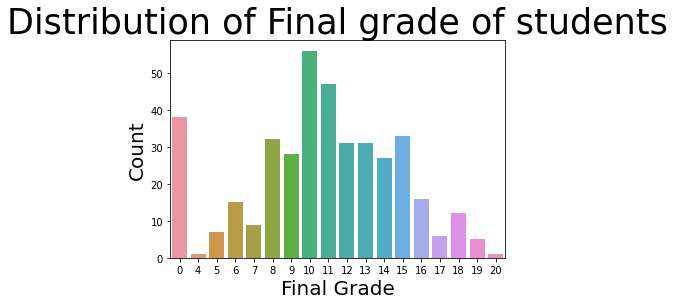

In [9]:
#Distribution of Final grade of students
demo= sns.countplot(df_train['G3'])
demo.axes.set_title('Distribution of Final grade of students', fontsize = 35)
demo.set_xlabel('Final Grade', fontsize = 20)
demo.set_ylabel('Count', fontsize = 20)
plt.show()

 Apart from the high number of students scoring 0, the distribution is normal as expected.Maybe the value 0 is used in place of null. Or maybe the students who did not appear for the exam, or were not allowed to sit for the exam due to some reason are marked as 0. We cannot be sure


In [10]:
#Let us check the table for null values
df_train.isnull().any()

reason        False
traveltime    False
studytime     False
schoolsup     False
famsup        False
paid          False
activities    False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
health        False
G3            False
dtype: bool

## 3-  Feature Correlation 

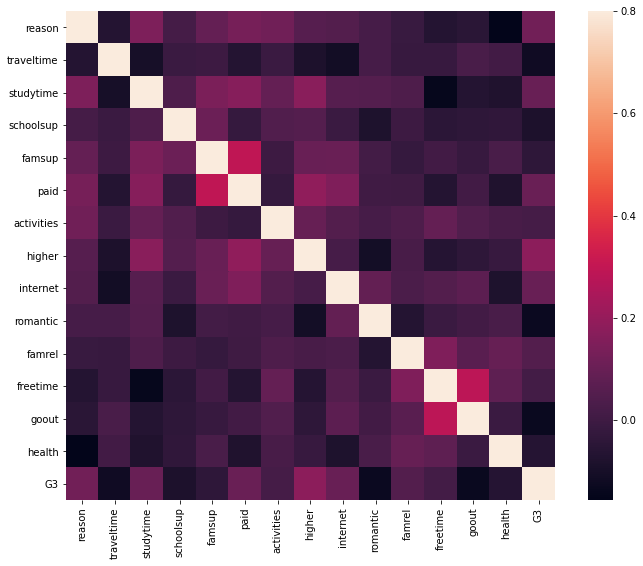

In [11]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

### 3.1 "finale note(G3)" correlation matrix

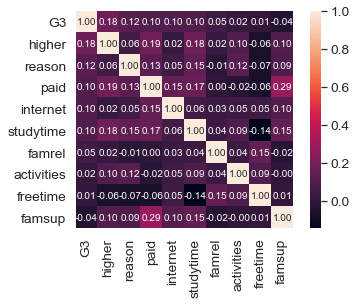

In [12]:
#finale note "G3" correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'G3')['G3'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## 4. Missing data

In [13]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(df_train['G3'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')

print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-2.27622599]
 [-2.27622599]
 [-2.27622599]
 [-2.27622599]
 [-2.27622599]
 [-2.27622599]
 [-2.27622599]
 [-2.27622599]
 [-2.27622599]
 [-2.27622599]]

outer range (high) of the distribution:
[[1.65765023]
 [1.65765023]
 [1.65765023]
 [1.65765023]
 [1.87619891]
 [1.87619891]
 [1.87619891]
 [1.87619891]
 [1.87619891]
 [2.09474759]]


# apply linear reggression

In [6]:
from sklearn.model_selection import train_test_split
x=df_train.drop("G3",axis=1)
y=df_train['G3']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state=44)

In [8]:
from sklearn.linear_model import LinearRegression 
L=LinearRegression()

In [9]:
L.fit(X_train, y_train)

LinearRegression()

In [10]:
X_test

,traveltime,studytime,schoolsup,famsup,paid,activities,higher,internet,romantic,famrel,freetime,goout,health
78,2,1,1,1,0,1,0,1,0,4,5,1,3
157,3,1,0,1,0,1,1,0,0,5,2,5,4
211,1,2,0,1,1,0,1,1,1,5,3,5,3
294,2,3,0,1,1,1,1,1,0,5,4,2,4
303,1,4,0,1,1,1,1,1,0,5,2,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,1,2,0,1,1,1,1,1,1,5,4,5,5
159,1,2,0,1,1,0,1,1,1,4,5,5,5
20,1,2,0,0,0,0,1,1,0,4,4,1,1
176,2,2,0,0,1,1,1,1,0,3,4,4,5


In [11]:
y_pred=L.predict(X_test)

In [12]:
print(L.score(X_test, y_test)) 

0.12364664131241043


In [14]:
import pickle

In [15]:
data = {"model": L }
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)